## Agregación datos de noticias, rating y lecturas de clientes

**- Notebook utilizado para acumular la información diaria de noticias, datos de lecturas y ratings de la base de clientes. Los datos utilizados van del 7 al 31 de julio**

<span style="color: red;"> **CONSIDERACIONES:** Dado el tamaño de las bases utilizadas, el proceso de acumulación de información se realiza de forma bastante manual liberando espacio en memoria mediante el vaciado de tablas intermedias. El tamaño de las tablas generadas alcanza las 21.274 filas correspondientes a noticias y las 90.000 columnas relativas a datos de lectura y rating de los 45.000 suscriptores. En total casi 2.000 millones de datos. Este ejercicio se ha realizado con un máquina con 32 gb de memoria RAM, por lo que la ejecución del notebook utilizando un ordenador con menor capacidad puede dar lugar a errores de memoria.</span>

**- Indice:**

    - Carga librerías
    - Importación datasets
        - Dataframe periódicos
        - Dataframes de clientes. 
            - Lectura de noticias
            - Rating noticias
        - Noticias freelance
    - Control check sobre lecturas y puntuación de noticias
    - Agrupación dataframes y depurado noticias
    - Generación datos para cuadro de mando

### Carga librerías

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import sqlite3
import glob
import matplotlib.pyplot as plt

### Importación datasets

### Dataframes de periódicos

In [2]:
# Importación dataframes de noticias y eliminación campo unnamed
dfp_070720 = pd.read_csv('datos/A_news/news_completo_07072020.csv',encoding='utf-8-sig', sep=';'); dfp_070720.drop(dfp_070720.columns[dfp_070720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_080720 = pd.read_csv('datos/A_news/news_completo_08072020.csv',encoding='utf-8-sig', sep=';'); dfp_080720.drop(dfp_080720.columns[dfp_080720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_090720 = pd.read_csv('datos/A_news/news_completo_09072020.csv',encoding='utf-8-sig', sep=';'); dfp_090720.drop(dfp_090720.columns[dfp_090720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_100720 = pd.read_csv('datos/A_news/news_completo_10072020.csv',encoding='utf-8-sig', sep=';'); dfp_100720.drop(dfp_100720.columns[dfp_100720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_110720 = pd.read_csv('datos/A_news/news_completo_11072020.csv',encoding='utf-8-sig', sep=';'); dfp_110720.drop(dfp_110720.columns[dfp_110720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_120720 = pd.read_csv('datos/A_news/news_completo_12072020.csv',encoding='utf-8-sig', sep=';'); dfp_120720.drop(dfp_120720.columns[dfp_120720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_130720 = pd.read_csv('datos/A_news/news_completo_13072020.csv',encoding='utf-8-sig', sep=';'); dfp_130720.drop(dfp_130720.columns[dfp_130720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_140720 = pd.read_csv('datos/A_news/news_completo_14072020.csv',encoding='utf-8-sig', sep=';'); dfp_140720.drop(dfp_140720.columns[dfp_140720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_150720 = pd.read_csv('datos/A_news/news_completo_15072020.csv',encoding='utf-8-sig', sep=';'); dfp_150720.drop(dfp_150720.columns[dfp_150720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_160720 = pd.read_csv('datos/A_news/news_completo_16072020.csv',encoding='utf-8-sig', sep=';'); dfp_160720.drop(dfp_160720.columns[dfp_160720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_170720 = pd.read_csv('datos/A_news/news_completo_17072020.csv',encoding='utf-8-sig', sep=';'); dfp_170720.drop(dfp_170720.columns[dfp_170720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_180720 = pd.read_csv('datos/A_news/news_completo_18072020.csv',encoding='utf-8-sig', sep=';'); dfp_180720.drop(dfp_180720.columns[dfp_180720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_190720 = pd.read_csv('datos/A_news/news_completo_19072020.csv',encoding='utf-8-sig', sep=';'); dfp_190720.drop(dfp_190720.columns[dfp_190720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_200720 = pd.read_csv('datos/A_news/news_completo_20072020.csv',encoding='utf-8-sig', sep=';'); dfp_200720.drop(dfp_200720.columns[dfp_200720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_210720 = pd.read_csv('datos/A_news/news_completo_21072020.csv',encoding='utf-8-sig', sep=';'); dfp_210720.drop(dfp_210720.columns[dfp_210720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_220720 = pd.read_csv('datos/A_news/news_completo_22072020.csv',encoding='utf-8-sig', sep=';'); dfp_220720.drop(dfp_220720.columns[dfp_220720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_230720 = pd.read_csv('datos/A_news/news_completo_23072020.csv',encoding='utf-8-sig', sep=';'); dfp_230720.drop(dfp_230720.columns[dfp_230720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_240720 = pd.read_csv('datos/A_news/news_completo_24072020.csv',encoding='utf-8-sig', sep=';'); dfp_240720.drop(dfp_240720.columns[dfp_240720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_250720 = pd.read_csv('datos/A_news/news_completo_25072020.csv',encoding='utf-8-sig', sep=';'); dfp_250720.drop(dfp_250720.columns[dfp_250720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_260720 = pd.read_csv('datos/A_news/news_completo_26072020.csv',encoding='utf-8-sig', sep=';'); dfp_260720.drop(dfp_260720.columns[dfp_260720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_270720 = pd.read_csv('datos/A_news/news_completo_27072020.csv',encoding='utf-8-sig', sep=';'); dfp_270720.drop(dfp_270720.columns[dfp_270720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_280720 = pd.read_csv('datos/A_news/news_completo_28072020.csv',encoding='utf-8-sig', sep=';'); dfp_280720.drop(dfp_280720.columns[dfp_280720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_290720 = pd.read_csv('datos/A_news/news_completo_29072020.csv',encoding='utf-8-sig', sep=';'); dfp_290720.drop(dfp_290720.columns[dfp_290720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_300720 = pd.read_csv('datos/A_news/news_completo_30072020.csv',encoding='utf-8-sig', sep=';'); dfp_300720.drop(dfp_300720.columns[dfp_300720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfp_310720 = pd.read_csv('datos/A_news/news_completo_31072020.csv',encoding='utf-8-sig', sep=';'); dfp_310720.drop(dfp_310720.columns[dfp_310720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [3]:
# Se prepara un nuevo campo para concatenar al identificador de la noticia la fecha del día al que corresponde
new_id_070720 = dfp_070720['new_id']; new_id_070720 = [new_id_070720]; lista_070720 = ('_070720'); lista070720 = (new_id_070720[0]+lista_070720); lista070720 = pd.DataFrame((lista070720)) 
new_id_080720 = dfp_080720['new_id']; new_id_080720 = [new_id_080720]; lista_080720 = ('_080720'); lista080720 = (new_id_080720[0]+lista_080720); lista080720 = pd.DataFrame((lista080720))
new_id_090720 = dfp_090720['new_id']; new_id_090720 = [new_id_090720]; lista_090720 = ('_090720'); lista090720 = (new_id_090720[0]+lista_090720); lista090720 = pd.DataFrame((lista090720))
new_id_100720 = dfp_100720['new_id']; new_id_100720 = [new_id_100720]; lista_100720 = ('_100720'); lista100720 = (new_id_100720[0]+lista_100720); lista100720 = pd.DataFrame((lista100720))
new_id_110720 = dfp_110720['new_id']; new_id_110720 = [new_id_110720]; lista_110720 = ('_110720'); lista110720 = (new_id_110720[0]+lista_110720); lista110720 = pd.DataFrame((lista110720))
new_id_120720 = dfp_120720['new_id']; new_id_120720 = [new_id_120720]; lista_120720 = ('_120720'); lista120720 = (new_id_120720[0]+lista_120720); lista120720 = pd.DataFrame((lista120720))
new_id_130720 = dfp_130720['new_id']; new_id_130720 = [new_id_130720]; lista_130720 = ('_130720'); lista130720 = (new_id_130720[0]+lista_130720); lista130720 = pd.DataFrame((lista130720))
new_id_140720 = dfp_140720['new_id']; new_id_140720 = [new_id_140720]; lista_140720 = ('_140720'); lista140720 = (new_id_140720[0]+lista_140720); lista140720 = pd.DataFrame((lista140720))
new_id_150720 = dfp_150720['new_id']; new_id_150720 = [new_id_150720]; lista_150720 = ('_150720'); lista150720 = (new_id_150720[0]+lista_150720); lista150720 = pd.DataFrame((lista150720))
new_id_160720 = dfp_160720['new_id']; new_id_160720 = [new_id_160720]; lista_160720 = ('_160720'); lista160720 = (new_id_160720[0]+lista_160720); lista160720 = pd.DataFrame((lista160720))
new_id_170720 = dfp_170720['new_id']; new_id_170720 = [new_id_170720]; lista_170720 = ('_170720'); lista170720 = (new_id_170720[0]+lista_170720); lista170720 = pd.DataFrame((lista170720))
new_id_180720 = dfp_180720['new_id']; new_id_180720 = [new_id_180720]; lista_180720 = ('_180720'); lista180720 = (new_id_180720[0]+lista_180720); lista180720 = pd.DataFrame((lista180720))
new_id_190720 = dfp_190720['new_id']; new_id_190720 = [new_id_190720]; lista_190720 = ('_190720'); lista190720 = (new_id_190720[0]+lista_190720); lista190720 = pd.DataFrame((lista190720))
new_id_200720 = dfp_200720['new_id']; new_id_200720 = [new_id_200720]; lista_200720 = ('_200720'); lista200720 = (new_id_200720[0]+lista_200720); lista200720 = pd.DataFrame((lista200720))
new_id_210720 = dfp_210720['new_id']; new_id_210720 = [new_id_210720]; lista_210720 = ('_210720'); lista210720 = (new_id_210720[0]+lista_210720); lista210720 = pd.DataFrame((lista210720))
new_id_220720 = dfp_220720['new_id']; new_id_220720 = [new_id_220720]; lista_220720 = ('_220720'); lista220720 = (new_id_220720[0]+lista_220720); lista220720 = pd.DataFrame((lista220720))
new_id_230720 = dfp_230720['new_id']; new_id_230720 = [new_id_230720]; lista_230720 = ('_230720'); lista230720 = (new_id_230720[0]+lista_230720); lista230720 = pd.DataFrame((lista230720))
new_id_240720 = dfp_240720['new_id']; new_id_240720 = [new_id_240720]; lista_240720 = ('_240720'); lista240720 = (new_id_240720[0]+lista_240720); lista240720 = pd.DataFrame((lista240720))
new_id_250720 = dfp_250720['new_id']; new_id_250720 = [new_id_250720]; lista_250720 = ('_250720'); lista250720 = (new_id_250720[0]+lista_250720); lista250720 = pd.DataFrame((lista250720))
new_id_260720 = dfp_260720['new_id']; new_id_260720 = [new_id_260720]; lista_260720 = ('_260720'); lista260720 = (new_id_260720[0]+lista_260720); lista260720 = pd.DataFrame((lista260720))
new_id_270720 = dfp_270720['new_id']; new_id_270720 = [new_id_270720]; lista_270720 = ('_270720'); lista270720 = (new_id_270720[0]+lista_270720); lista270720 = pd.DataFrame((lista270720))
new_id_280720 = dfp_280720['new_id']; new_id_280720 = [new_id_280720]; lista_280720 = ('_280720'); lista280720 = (new_id_280720[0]+lista_280720); lista280720 = pd.DataFrame((lista280720))
new_id_290720 = dfp_290720['new_id']; new_id_290720 = [new_id_290720]; lista_290720 = ('_290720'); lista290720 = (new_id_290720[0]+lista_290720); lista290720 = pd.DataFrame((lista290720))
new_id_300720 = dfp_300720['new_id']; new_id_300720 = [new_id_300720]; lista_300720 = ('_300720'); lista300720 = (new_id_300720[0]+lista_300720); lista300720 = pd.DataFrame((lista300720))
new_id_310720 = dfp_310720['new_id']; new_id_310720 = [new_id_310720]; lista_310720 = ('_310720'); lista310720 = (new_id_310720[0]+lista_310720); lista310720 = pd.DataFrame((lista310720))


In [4]:
# Se elimina el id de la noticia y se añade nuevo id con la fecha correspondiente
dfp_070720 = dfp_070720.drop('new_id', axis=1); dfp_070720 = pd.DataFrame(dfp_070720); dfp_070720 = pd.concat([lista070720, dfp_070720 ], axis=1)
dfp_080720 = dfp_080720.drop('new_id', axis=1); dfp_080720 = pd.DataFrame(dfp_080720); dfp_080720 = pd.concat([lista080720, dfp_080720 ], axis=1)
dfp_090720 = dfp_090720.drop('new_id', axis=1); dfp_090720 = pd.DataFrame(dfp_090720); dfp_090720 = pd.concat([lista090720, dfp_090720 ], axis=1)
dfp_100720 = dfp_100720.drop('new_id', axis=1); dfp_100720 = pd.DataFrame(dfp_100720); dfp_100720 = pd.concat([lista100720, dfp_100720 ], axis=1)
dfp_110720 = dfp_110720.drop('new_id', axis=1); dfp_110720 = pd.DataFrame(dfp_110720); dfp_110720 = pd.concat([lista110720, dfp_110720 ], axis=1)
dfp_120720 = dfp_120720.drop('new_id', axis=1); dfp_120720 = pd.DataFrame(dfp_120720); dfp_120720 = pd.concat([lista120720, dfp_120720 ], axis=1)
dfp_130720 = dfp_130720.drop('new_id', axis=1); dfp_130720 = pd.DataFrame(dfp_130720); dfp_130720 = pd.concat([lista130720, dfp_130720 ], axis=1)
dfp_140720 = dfp_140720.drop('new_id', axis=1); dfp_140720 = pd.DataFrame(dfp_140720); dfp_140720 = pd.concat([lista140720, dfp_140720 ], axis=1)
dfp_150720 = dfp_150720.drop('new_id', axis=1); dfp_150720 = pd.DataFrame(dfp_150720); dfp_150720 = pd.concat([lista150720, dfp_150720 ], axis=1)
dfp_160720 = dfp_160720.drop('new_id', axis=1); dfp_160720 = pd.DataFrame(dfp_160720); dfp_160720 = pd.concat([lista160720, dfp_160720 ], axis=1)
dfp_170720 = dfp_170720.drop('new_id', axis=1); dfp_170720 = pd.DataFrame(dfp_170720); dfp_170720 = pd.concat([lista170720, dfp_170720 ], axis=1)
dfp_180720 = dfp_180720.drop('new_id', axis=1); dfp_180720 = pd.DataFrame(dfp_180720); dfp_180720 = pd.concat([lista180720, dfp_180720 ], axis=1)
dfp_190720 = dfp_190720.drop('new_id', axis=1); dfp_190720 = pd.DataFrame(dfp_190720); dfp_190720 = pd.concat([lista190720, dfp_190720 ], axis=1)
dfp_200720 = dfp_200720.drop('new_id', axis=1); dfp_200720 = pd.DataFrame(dfp_200720); dfp_200720 = pd.concat([lista200720, dfp_200720 ], axis=1)
dfp_210720 = dfp_210720.drop('new_id', axis=1); dfp_210720 = pd.DataFrame(dfp_210720); dfp_210720 = pd.concat([lista210720, dfp_210720 ], axis=1)
dfp_220720 = dfp_220720.drop('new_id', axis=1); dfp_220720 = pd.DataFrame(dfp_220720); dfp_220720 = pd.concat([lista220720, dfp_220720 ], axis=1)
dfp_230720 = dfp_230720.drop('new_id', axis=1); dfp_230720 = pd.DataFrame(dfp_230720); dfp_230720 = pd.concat([lista230720, dfp_230720 ], axis=1)
dfp_240720 = dfp_240720.drop('new_id', axis=1); dfp_240720 = pd.DataFrame(dfp_240720); dfp_240720 = pd.concat([lista240720, dfp_240720 ], axis=1)
dfp_250720 = dfp_250720.drop('new_id', axis=1); dfp_250720 = pd.DataFrame(dfp_250720); dfp_250720 = pd.concat([lista250720, dfp_250720 ], axis=1)
dfp_260720 = dfp_260720.drop('new_id', axis=1); dfp_260720 = pd.DataFrame(dfp_260720); dfp_260720 = pd.concat([lista260720, dfp_260720 ], axis=1)
dfp_270720 = dfp_270720.drop('new_id', axis=1); dfp_270720 = pd.DataFrame(dfp_270720); dfp_270720 = pd.concat([lista270720, dfp_270720 ], axis=1)
dfp_280720 = dfp_280720.drop('new_id', axis=1); dfp_280720 = pd.DataFrame(dfp_280720); dfp_280720 = pd.concat([lista280720, dfp_280720 ], axis=1)
dfp_290720 = dfp_290720.drop('new_id', axis=1); dfp_290720 = pd.DataFrame(dfp_290720); dfp_290720 = pd.concat([lista290720, dfp_290720 ], axis=1)
dfp_300720 = dfp_300720.drop('new_id', axis=1); dfp_300720 = pd.DataFrame(dfp_300720); dfp_300720 = pd.concat([lista300720, dfp_300720 ], axis=1)
dfp_310720 = dfp_310720.drop('new_id', axis=1); dfp_310720 = pd.DataFrame(dfp_310720); dfp_310720 = pd.concat([lista310720, dfp_310720 ], axis=1)

In [5]:
# Se concatenan las tablas diarias de noticias acumulando la información
dfp_total = pd.concat([dfp_070720, dfp_080720, dfp_090720, dfp_100720, dfp_110720, dfp_120720, dfp_130720, 
                       dfp_140720, dfp_150720, dfp_160720, dfp_170720, dfp_180720, dfp_190720, dfp_200720,
                       dfp_210720, dfp_220720, dfp_230720, dfp_240720, dfp_250720, dfp_260720, dfp_270720,
                       dfp_280720, dfp_290720, dfp_300720, dfp_310720])

### Dataframes de clientes - Lectura de noticias

In [6]:
# Importamos dataframes de datos de lectura de clientes y añadimos sufijo con la fecha
cl_070720 = pd.read_csv('datos/B_lecturas/clientes_lectura_07072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_070720')
cl_080720 = pd.read_csv('datos/B_lecturas/clientes_lectura_08072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_080720')
cl_090720 = pd.read_csv('datos/B_lecturas/clientes_lectura_09072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_090720')
cl_100720 = pd.read_csv('datos/B_lecturas/clientes_lectura_10072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_100720')
cl_110720 = pd.read_csv('datos/B_lecturas/clientes_lectura_11072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_110720')
cl_120720 = pd.read_csv('datos/B_lecturas/clientes_lectura_12072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_120720')
cl_130720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_13072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_130720')
cl_140720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_14072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_140720')
cl_150720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_15072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_150720')
cl_160720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_16072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_160720')
cl_170720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_17072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_170720')
cl_180720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_18072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_180720')
cl_190720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_19072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_190720')
cl_200720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_20072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_200720')
cl_210720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_21072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_210720')
cl_220720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_22072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_220720')
cl_230720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_23072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_230720')
cl_240720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_24072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_240720')
cl_250720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_25072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_250720')
cl_260720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_26072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_260720')
cl_270720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_27072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_270720')
cl_280720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_28072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_280720')
cl_290720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_29072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_290720')
cl_300720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_30072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_300720')
cl_310720 = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_31072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_310720')

In [7]:
# Insertamos ID_cliente
cl_070720.insert(0, 'Customer_ID', range(1, 1 + len(cl_070720)))
cl_080720.insert(0, 'Customer_ID', range(1, 1 + len(cl_080720)))
cl_090720.insert(0, 'Customer_ID', range(1, 1 + len(cl_090720)))
cl_100720.insert(0, 'Customer_ID', range(1, 1 + len(cl_100720)))
cl_110720.insert(0, 'Customer_ID', range(1, 1 + len(cl_110720)))
cl_120720.insert(0, 'Customer_ID', range(1, 1 + len(cl_120720)))
cl_130720.insert(0, 'Customer_ID', range(1, 1 + len(cl_130720)))
cl_140720.insert(0, 'Customer_ID', range(1, 1 + len(cl_140720)))
cl_150720.insert(0, 'Customer_ID', range(1, 1 + len(cl_150720)))
cl_160720.insert(0, 'Customer_ID', range(1, 1 + len(cl_160720)))
cl_170720.insert(0, 'Customer_ID', range(1, 1 + len(cl_170720)))
cl_180720.insert(0, 'Customer_ID', range(1, 1 + len(cl_180720)))
cl_190720.insert(0, 'Customer_ID', range(1, 1 + len(cl_190720)))
cl_200720.insert(0, 'Customer_ID', range(1, 1 + len(cl_200720)))
cl_210720.insert(0, 'Customer_ID', range(1, 1 + len(cl_210720)))
cl_220720.insert(0, 'Customer_ID', range(1, 1 + len(cl_220720)))
cl_230720.insert(0, 'Customer_ID', range(1, 1 + len(cl_230720)))
cl_240720.insert(0, 'Customer_ID', range(1, 1 + len(cl_240720)))
cl_250720.insert(0, 'Customer_ID', range(1, 1 + len(cl_250720)))
cl_260720.insert(0, 'Customer_ID', range(1, 1 + len(cl_260720)))
cl_270720.insert(0, 'Customer_ID', range(1, 1 + len(cl_270720)))
cl_280720.insert(0, 'Customer_ID', range(1, 1 + len(cl_280720)))
cl_290720.insert(0, 'Customer_ID', range(1, 1 + len(cl_290720)))
cl_300720.insert(0, 'Customer_ID', range(1, 1 + len(cl_300720)))
cl_310720.insert(0, 'Customer_ID', range(1, 1 + len(cl_310720)))

# y eliminamos el campo unnamed
cl_070720.drop(cl_070720.columns[cl_070720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_080720.drop(cl_080720.columns[cl_080720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_090720.drop(cl_090720.columns[cl_090720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_100720.drop(cl_100720.columns[cl_100720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_110720.drop(cl_110720.columns[cl_110720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_120720.drop(cl_120720.columns[cl_120720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_130720.drop(cl_130720.columns[cl_130720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_140720.drop(cl_140720.columns[cl_140720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_150720.drop(cl_150720.columns[cl_150720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_160720.drop(cl_160720.columns[cl_160720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_170720.drop(cl_170720.columns[cl_170720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_180720.drop(cl_180720.columns[cl_180720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_190720.drop(cl_190720.columns[cl_190720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_200720.drop(cl_200720.columns[cl_200720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_210720.drop(cl_210720.columns[cl_210720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_220720.drop(cl_220720.columns[cl_220720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_230720.drop(cl_230720.columns[cl_230720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_240720.drop(cl_240720.columns[cl_240720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_250720.drop(cl_250720.columns[cl_250720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_260720.drop(cl_260720.columns[cl_260720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_270720.drop(cl_270720.columns[cl_270720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_280720.drop(cl_280720.columns[cl_280720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_290720.drop(cl_290720.columns[cl_290720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_300720.drop(cl_300720.columns[cl_300720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cl_310720.drop(cl_310720.columns[cl_310720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [8]:
# Acumulamos diariamente la información sobre lecturas de noticias eliminando tablas intermedias
cl_total_080720 = pd.merge(cl_070720,cl_080720, on='Customer_ID')
cl_total_090720 = pd.merge(cl_total_080720,cl_090720, on='Customer_ID') ; cl_total_080720 = pd.DataFrame()
cl_total_100720 = pd.merge(cl_total_090720,cl_100720, on='Customer_ID') ; cl_total_090720 = pd.DataFrame()
cl_total_110720 = pd.merge(cl_total_100720,cl_110720, on='Customer_ID') ; cl_total_100720 = pd.DataFrame()
cl_total_120720 = pd.merge(cl_total_110720,cl_120720, on='Customer_ID') ; cl_total_110720 = pd.DataFrame()
cl_total_130720 = pd.merge(cl_total_120720,cl_130720, on='Customer_ID') ; cl_total_120720 = pd.DataFrame()
cl_total_140720 = pd.merge(cl_total_130720,cl_140720, on='Customer_ID') ; cl_total_130720 = pd.DataFrame()
cl_total_150720 = pd.merge(cl_total_140720,cl_150720, on='Customer_ID') ; cl_total_140720 = pd.DataFrame()
cl_total_160720 = pd.merge(cl_total_150720,cl_160720, on='Customer_ID') ; cl_total_150720 = pd.DataFrame()
cl_total_170720 = pd.merge(cl_total_160720,cl_170720, on='Customer_ID') ; cl_total_160720 = pd.DataFrame()
cl_total_180720 = pd.merge(cl_total_170720,cl_180720, on='Customer_ID') ; cl_total_170720 = pd.DataFrame()
cl_total_190720 = pd.merge(cl_total_180720,cl_190720, on='Customer_ID') ; cl_total_180720 = pd.DataFrame()
cl_total_200720 = pd.merge(cl_total_190720,cl_200720, on='Customer_ID') ; cl_total_190720 = pd.DataFrame()
cl_total_210720 = pd.merge(cl_total_200720,cl_210720, on='Customer_ID') ; cl_total_200720 = pd.DataFrame()
cl_total_220720 = pd.merge(cl_total_210720,cl_220720, on='Customer_ID') ; cl_total_210720 = pd.DataFrame()
cl_total_230720 = pd.merge(cl_total_220720,cl_230720, on='Customer_ID') ; cl_total_220720 = pd.DataFrame()
cl_total_240720 = pd.merge(cl_total_230720,cl_240720, on='Customer_ID') ; cl_total_230720 = pd.DataFrame()
cl_total_250720 = pd.merge(cl_total_240720,cl_250720, on='Customer_ID') ; cl_total_240720 = pd.DataFrame()
cl_total_260720 = pd.merge(cl_total_250720,cl_260720, on='Customer_ID') ; cl_total_250720 = pd.DataFrame()
cl_total_270720 = pd.merge(cl_total_260720,cl_270720, on='Customer_ID') ; cl_total_260720 = pd.DataFrame()
cl_total_280720 = pd.merge(cl_total_270720,cl_280720, on='Customer_ID') ; cl_total_270720 = pd.DataFrame()
cl_total_290720 = pd.merge(cl_total_280720,cl_290720, on='Customer_ID') ; cl_total_280720 = pd.DataFrame()
cl_total_300720 = pd.merge(cl_total_290720,cl_300720, on='Customer_ID') ; cl_total_290720 = pd.DataFrame()
cl_total_310720 = pd.merge(cl_total_300720,cl_310720, on='Customer_ID') ; cl_total_300720 = pd.DataFrame()

In [9]:
# Generamos tabla con el total de lecturas en base a los últimos datos acumulados disponibles
cl_total = cl_total_310720.T.add_prefix('cl_')
# Eliminamos el customerID que se va a fila al trasponer
cl_total = cl_total.drop(cl_total.index[0]) 
# Consideramos índice como columna y modificamos nombre para cruce
cl_total = cl_total.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='').rename(columns={'index': 'new_id'}) 

### Dataframes de clientes - Rating noticias

Aplicamos la misma metodología utilizada para los datos de lecturas para las puntuaciones de los usuarios

In [10]:
# Al igual que para datos de lecturas, importamos dataframes de datos de puntuación de los clientes y añadimos sufijo fecha
cr_070720 = pd.read_csv('datos/C_ratings/clientes_rank_07072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_070720')
cr_080720 = pd.read_csv('datos/C_ratings/clientes_rank_08072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_080720')
cr_090720 = pd.read_csv('datos/C_ratings/clientes_rank_09072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_090720')
cr_100720 = pd.read_csv('datos/C_ratings/clientes_rank_10072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_100720')
cr_110720 = pd.read_csv('datos/C_ratings/clientes_rank_11072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_110720')
cr_120720 = pd.read_csv('datos/C_ratings/clientes_rank_12072020.csv',encoding='utf-8-sig', sep=';').add_suffix('_120720')
cr_130720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_13072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_130720')
cr_140720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_14072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_140720')
cr_150720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_15072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_150720')
cr_160720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_16072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_160720')
cr_170720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_17072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_170720')
cr_180720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_18072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_180720')
cr_190720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_19072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_190720')
cr_200720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_20072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_200720')
cr_210720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_21072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_210720')
cr_220720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_22072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_220720')
cr_230720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_23072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_230720')
cr_240720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_24072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_240720')
cr_250720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_25072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_250720')
cr_260720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_26072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_260720')
cr_270720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_27072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_270720')
cr_280720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_28072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_280720')
cr_290720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_29072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_290720')
cr_300720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_30072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_300720')
cr_310720 = pd.read_csv('datos/C_ratings/clientes_susc_rank_31072020.csv',encoding='utf-8-sig', sep=';').drop('suscripcion', axis=1).add_suffix('_310720')

In [11]:
# Insertamos ID_cliente
cr_070720.insert(0, 'Customer_ID', range(1, 1 + len(cr_070720)))
cr_080720.insert(0, 'Customer_ID', range(1, 1 + len(cr_080720)))
cr_090720.insert(0, 'Customer_ID', range(1, 1 + len(cr_090720)))
cr_100720.insert(0, 'Customer_ID', range(1, 1 + len(cr_100720)))
cr_110720.insert(0, 'Customer_ID', range(1, 1 + len(cr_110720)))
cr_120720.insert(0, 'Customer_ID', range(1, 1 + len(cr_120720)))
cr_130720.insert(0, 'Customer_ID', range(1, 1 + len(cr_130720)))
cr_140720.insert(0, 'Customer_ID', range(1, 1 + len(cr_140720)))
cr_150720.insert(0, 'Customer_ID', range(1, 1 + len(cr_150720)))
cr_160720.insert(0, 'Customer_ID', range(1, 1 + len(cr_160720)))
cr_170720.insert(0, 'Customer_ID', range(1, 1 + len(cr_170720)))
cr_180720.insert(0, 'Customer_ID', range(1, 1 + len(cr_180720)))
cr_190720.insert(0, 'Customer_ID', range(1, 1 + len(cr_190720)))
cr_200720.insert(0, 'Customer_ID', range(1, 1 + len(cr_200720)))
cr_210720.insert(0, 'Customer_ID', range(1, 1 + len(cr_210720)))
cr_220720.insert(0, 'Customer_ID', range(1, 1 + len(cr_220720)))
cr_230720.insert(0, 'Customer_ID', range(1, 1 + len(cr_230720)))
cr_240720.insert(0, 'Customer_ID', range(1, 1 + len(cr_240720)))
cr_250720.insert(0, 'Customer_ID', range(1, 1 + len(cr_250720)))
cr_260720.insert(0, 'Customer_ID', range(1, 1 + len(cr_260720)))
cr_270720.insert(0, 'Customer_ID', range(1, 1 + len(cr_270720)))
cr_280720.insert(0, 'Customer_ID', range(1, 1 + len(cr_280720)))
cr_290720.insert(0, 'Customer_ID', range(1, 1 + len(cr_290720)))
cr_300720.insert(0, 'Customer_ID', range(1, 1 + len(cr_300720)))
cr_310720.insert(0, 'Customer_ID', range(1, 1 + len(cr_310720)))

# y eliminamos el campo unnamed
cr_070720.drop(cr_070720.columns[cr_070720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_080720.drop(cr_080720.columns[cr_080720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_090720.drop(cr_090720.columns[cr_090720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_100720.drop(cr_100720.columns[cr_100720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_110720.drop(cr_110720.columns[cr_110720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_120720.drop(cr_120720.columns[cr_120720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_130720.drop(cr_130720.columns[cr_130720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_140720.drop(cr_140720.columns[cr_140720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_150720.drop(cr_150720.columns[cr_150720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_160720.drop(cr_160720.columns[cr_160720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_170720.drop(cr_170720.columns[cr_170720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_180720.drop(cr_180720.columns[cr_180720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_190720.drop(cr_190720.columns[cr_190720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_200720.drop(cr_200720.columns[cr_200720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_210720.drop(cr_210720.columns[cr_210720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_220720.drop(cr_220720.columns[cr_220720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_230720.drop(cr_230720.columns[cr_230720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_240720.drop(cr_240720.columns[cr_240720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_250720.drop(cr_250720.columns[cr_250720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_260720.drop(cr_260720.columns[cr_260720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_270720.drop(cr_270720.columns[cr_270720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_280720.drop(cr_280720.columns[cr_280720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_290720.drop(cr_290720.columns[cr_290720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_300720.drop(cr_300720.columns[cr_300720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cr_310720.drop(cr_310720.columns[cr_310720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [12]:
# Acumulamos diariamente la información sobre lecturas de noticias eliminando tablas intermedias
cr_total_080720 = pd.merge(cr_070720,cr_080720, on='Customer_ID')
cr_total_090720 = pd.merge(cr_total_080720,cr_090720, on='Customer_ID') ; cr_total_080720 = pd.DataFrame()
cr_total_100720 = pd.merge(cr_total_090720,cr_100720, on='Customer_ID') ; cr_total_090720 = pd.DataFrame()
cr_total_110720 = pd.merge(cr_total_100720,cr_110720, on='Customer_ID') ; cr_total_100720 = pd.DataFrame()
cr_total_120720 = pd.merge(cr_total_110720,cr_120720, on='Customer_ID') ; cr_total_110720 = pd.DataFrame()
cr_total_130720 = pd.merge(cr_total_120720,cr_130720, on='Customer_ID') ; cr_total_120720 = pd.DataFrame()
cr_total_140720 = pd.merge(cr_total_130720,cr_140720, on='Customer_ID') ; cr_total_130720 = pd.DataFrame()
cr_total_150720 = pd.merge(cr_total_140720,cr_150720, on='Customer_ID') ; cr_total_140720 = pd.DataFrame()
cr_total_160720 = pd.merge(cr_total_150720,cr_160720, on='Customer_ID') ; cr_total_150720 = pd.DataFrame()
cr_total_170720 = pd.merge(cr_total_160720,cr_170720, on='Customer_ID') ; cr_total_160720 = pd.DataFrame()
cr_total_180720 = pd.merge(cr_total_170720,cr_180720, on='Customer_ID') ; cr_total_170720 = pd.DataFrame()
cr_total_190720 = pd.merge(cr_total_180720,cr_190720, on='Customer_ID') ; cr_total_180720 = pd.DataFrame()
cr_total_200720 = pd.merge(cr_total_190720,cr_200720, on='Customer_ID') ; cr_total_190720 = pd.DataFrame()
cr_total_210720 = pd.merge(cr_total_200720,cr_210720, on='Customer_ID') ; cr_total_200720 = pd.DataFrame()
cr_total_220720 = pd.merge(cr_total_210720,cr_220720, on='Customer_ID') ; cr_total_210720 = pd.DataFrame()
cr_total_230720 = pd.merge(cr_total_220720,cr_230720, on='Customer_ID') ; cr_total_220720 = pd.DataFrame()
cr_total_240720 = pd.merge(cr_total_230720,cr_240720, on='Customer_ID') ; cr_total_230720 = pd.DataFrame()
cr_total_250720 = pd.merge(cr_total_240720,cr_250720, on='Customer_ID') ; cr_total_240720 = pd.DataFrame()
cr_total_260720 = pd.merge(cr_total_250720,cr_260720, on='Customer_ID') ; cr_total_250720 = pd.DataFrame()
cr_total_270720 = pd.merge(cr_total_260720,cr_270720, on='Customer_ID') ; cr_total_260720 = pd.DataFrame()
cr_total_280720 = pd.merge(cr_total_270720,cr_280720, on='Customer_ID') ; cr_total_270720 = pd.DataFrame()
cr_total_290720 = pd.merge(cr_total_280720,cr_290720, on='Customer_ID') ; cr_total_280720 = pd.DataFrame()
cr_total_300720 = pd.merge(cr_total_290720,cr_300720, on='Customer_ID') ; cr_total_290720 = pd.DataFrame()
cr_total_310720 = pd.merge(cr_total_300720,cr_310720, on='Customer_ID') ; cr_total_300720 = pd.DataFrame()

In [13]:
# Generamos tabla con el total de lecturas en base a los últimos datos acumulados disponibles
cr_total = cr_total_310720.T.add_prefix('cr_')
# Eliminamos el customerID que se va a fila al trasponer
cr_total = cr_total.drop(cr_total.index[0]) 
# Consideramos índice como columna y modificamos nombre para cruce
cr_total = cr_total.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='').rename(columns={'index': 'new_id'}) 

### Noticias Freelance

In [14]:
# Se obtienen los dataframes de noticias de freelances y se elimina de los dataframe de periódicos el campo unnamed
free_190720 = pd.read_csv('datos/D_freelance/freelance_19072020.csv',encoding='utf-8-sig', sep=';'); free_190720.drop(free_190720.columns[free_190720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
free_200720 = pd.read_csv('datos/D_freelance/freelance_20072020.csv',encoding='utf-8-sig', sep=';'); free_200720.drop(free_190720.columns[free_190720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
free_210720 = pd.read_csv('datos/D_freelance/freelance_21072020.csv',encoding='utf-8-sig', sep=';'); free_210720.drop(free_190720.columns[free_190720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
free_220720 = pd.read_csv('datos/D_freelance/freelance_22072020.csv',encoding='utf-8-sig', sep=';'); free_220720.drop(free_190720.columns[free_190720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
free_240720 = pd.read_csv('datos/D_freelance/freelance_24072020.csv',encoding='utf-8-sig', sep=';'); free_240720.drop(free_190720.columns[free_190720.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Se prepara un nuevo campo para concatenar al identificador de la noticia la fecha del día al que corresponde
new_id_free_190720 = free_190720['new_id']; new_id_free_190720 = [new_id_free_190720]; lista_free_190720 = ('_190720'); lista_free_190720 = (new_id_free_190720[0]+lista_free_190720); lista_free_190720 = pd.DataFrame((lista_free_190720))
new_id_free_200720 = free_200720['new_id']; new_id_free_200720 = [new_id_free_200720]; lista_free_200720 = ('_200720'); lista_free_200720 = (new_id_free_200720[0]+lista_free_200720); lista_free_200720 = pd.DataFrame((lista_free_200720))
new_id_free_210720 = free_210720['new_id']; new_id_free_210720 = [new_id_free_210720]; lista_free_210720 = ('_210720'); lista_free_210720 = (new_id_free_210720[0]+lista_free_210720); lista_free_210720 = pd.DataFrame((lista_free_210720))
new_id_free_220720 = free_220720['new_id']; new_id_free_220720 = [new_id_free_220720]; lista_free_220720 = ('_220720'); lista_free_220720 = (new_id_free_220720[0]+lista_free_220720); lista_free_220720 = pd.DataFrame((lista_free_220720))
new_id_free_240720 = free_240720['new_id']; new_id_free_240720 = [new_id_free_240720]; lista_free_240720 = ('_240720'); lista_free_240720 = (new_id_free_240720[0]+lista_free_240720); lista_free_240720 = pd.DataFrame((lista_free_240720))

# Se elimina el id de la noticia y se añade nuevo id con la fecha correspondiente
free_190720 = free_190720.drop('new_id', axis=1); free_190720 = pd.DataFrame(free_190720); free_190720 = pd.concat([lista_free_190720, free_190720], axis=1)
free_200720 = free_200720.drop('new_id', axis=1); free_200720 = pd.DataFrame(free_200720); free_200720 = pd.concat([lista_free_200720, free_200720], axis=1)
free_210720 = free_210720.drop('new_id', axis=1); free_210720 = pd.DataFrame(free_210720); free_210720 = pd.concat([lista_free_210720, free_210720], axis=1)
free_220720 = free_220720.drop('new_id', axis=1); free_220720 = pd.DataFrame(free_220720); free_220720 = pd.concat([lista_free_220720, free_220720], axis=1)
free_240720 = free_240720.drop('new_id', axis=1); free_240720 = pd.DataFrame(free_240720); free_240720 = pd.concat([lista_free_240720, free_240720], axis=1)

# Se concatenan las tablas diarias de noticias acumulando la información
df_free = pd.concat([free_190720, free_200720, free_210720, free_220720, free_240720])

### Suscripciones

Creamos dataframe partiendo de la importación de últimos datos disponibles con el ID cliente y su tipo de suscripción.

In [15]:
suscripciones_df = pd.read_csv('datos/B_lecturas/clientes_susc_lectura_31072020.csv', usecols=[1], encoding='utf-8-sig', sep=';')
suscripciones_df.insert(0, 'Customer_ID', range(1, 1+len(suscripciones_df)))
suscripciones_df.drop(suscripciones_df.columns[suscripciones_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

### Control check sobre lecturas y puntuación de noticias

Realizamos un control sobre la importación de los datos para asegurar que se está realizando bien la importación de los datos de noticias, lecturas y ratings tanto diariamente como su acumulado final.

Posteriormente liberamos toda la memoria posible de datos intermedios que no se van a volver a utilizar en el proceso.

In [16]:
print(cl_070720.shape, cr_070720.shape, dfp_070720.shape)
print(cl_080720.shape, cr_080720.shape, dfp_080720.shape)
print(cl_090720.shape, cr_090720.shape, dfp_090720.shape)
print(cl_100720.shape, cr_100720.shape, dfp_100720.shape)
print(cl_110720.shape, cr_110720.shape, dfp_110720.shape)
print(cl_120720.shape, cr_120720.shape, dfp_120720.shape)
print(cl_130720.shape, cr_130720.shape, dfp_130720.shape)
print(cl_140720.shape, cr_140720.shape, dfp_140720.shape)
print(cl_150720.shape, cr_150720.shape, dfp_150720.shape)
print(cl_160720.shape, cr_160720.shape, dfp_160720.shape)
print(cl_170720.shape, cr_170720.shape, dfp_170720.shape)
print(cl_180720.shape, cr_180720.shape, dfp_180720.shape)
print(cl_190720.shape, cr_190720.shape, dfp_190720.shape)
print(cl_200720.shape, cr_200720.shape, dfp_200720.shape)
print(cl_210720.shape, cr_210720.shape, dfp_210720.shape)
print(cl_220720.shape, cr_220720.shape, dfp_220720.shape)
print(cl_230720.shape, cr_230720.shape, dfp_230720.shape)
print(cl_240720.shape, cr_240720.shape, dfp_240720.shape)
print(cl_250720.shape, cr_250720.shape, dfp_250720.shape)
print(cl_260720.shape, cr_260720.shape, dfp_260720.shape)
print(cl_270720.shape, cr_270720.shape, dfp_270720.shape)
print(cl_280720.shape, cr_280720.shape, dfp_280720.shape)
print(cl_290720.shape, cr_290720.shape, dfp_290720.shape)
print(cl_300720.shape, cr_300720.shape, dfp_300720.shape)
print(cl_310720.shape, cr_310720.shape, dfp_310720.shape)

print(cl_total.shape, cr_total.shape)

(90000, 268) (90000, 268) (267, 10)
(90000, 268) (90000, 268) (267, 10)
(90000, 485) (90000, 485) (484, 10)
(90000, 640) (90000, 640) (639, 10)
(90000, 734) (90000, 734) (733, 10)
(90000, 743) (90000, 743) (742, 10)
(45000, 973) (45000, 973) (972, 10)
(45000, 953) (45000, 953) (952, 10)
(45000, 998) (45000, 998) (997, 10)
(45000, 1059) (45000, 1059) (1058, 10)
(45000, 1051) (45000, 1051) (1050, 10)
(45000, 1020) (45000, 1020) (1019, 10)
(45000, 1024) (45000, 1024) (1023, 10)
(45000, 1014) (45000, 1014) (1013, 10)
(45000, 1051) (45000, 1051) (1050, 10)
(45000, 1020) (45000, 1020) (1019, 10)
(45000, 1042) (45000, 1042) (1041, 10)
(45000, 1040) (45000, 1040) (1039, 10)
(45000, 828) (45000, 828) (827, 10)
(45000, 833) (45000, 833) (832, 10)
(45000, 845) (45000, 845) (844, 10)
(45000, 870) (45000, 870) (869, 10)
(45000, 860) (45000, 860) (859, 10)
(45000, 810) (45000, 810) (809, 10)
(45000, 870) (45000, 870) (869, 10)
(21274, 45001) (21274, 45001)


*liberamos memoria de tablas intermedias CR y CL*

In [17]:
cr_070720 = pd.DataFrame(); cr_080720 = pd.DataFrame(); cr_090720 = pd.DataFrame(); cr_100720 = pd.DataFrame()
cr_110720 = pd.DataFrame(); cr_120720 = pd.DataFrame(); cr_130720 = pd.DataFrame(); cr_140720 = pd.DataFrame()
cr_150720 = pd.DataFrame(); cr_160720 = pd.DataFrame(); cr_170720 = pd.DataFrame(); cr_180720 = pd.DataFrame()
cr_190720 = pd.DataFrame(); cr_200720 = pd.DataFrame(); cr_210720 = pd.DataFrame(); cr_220720 = pd.DataFrame()
cr_230720 = pd.DataFrame(); cr_240720 = pd.DataFrame(); cr_250720 = pd.DataFrame(); cr_260720 = pd.DataFrame()
cr_270720 = pd.DataFrame(); cr_280720 = pd.DataFrame(); cr_290720 = pd.DataFrame(); cr_300720 = pd.DataFrame();
cr_310720 = pd.DataFrame()

cl_070720 = pd.DataFrame(); cl_080720 = pd.DataFrame(); cl_090720 = pd.DataFrame(); cl_100720 = pd.DataFrame()
cl_110720 = pd.DataFrame(); cl_120720 = pd.DataFrame(); cl_130720 = pd.DataFrame(); cl_140720 = pd.DataFrame()
cl_150720 = pd.DataFrame(); cl_160720 = pd.DataFrame(); cl_170720 = pd.DataFrame(); cl_180720 = pd.DataFrame()
cl_190720 = pd.DataFrame(); cl_200720 = pd.DataFrame(); cl_210720 = pd.DataFrame(); cl_220720 = pd.DataFrame()
cl_230720 = pd.DataFrame(); cl_240720 = pd.DataFrame(); cl_250720 = pd.DataFrame(); cl_260720 = pd.DataFrame()
cl_270720 = pd.DataFrame(); cl_280720 = pd.DataFrame(); cl_290720 = pd.DataFrame(); cl_300720 = pd.DataFrame();
cl_310720 = pd.DataFrame()

### Agrupación dataframes y depurado noticias (preprocesado datos)

- Agrupamos las tablas de noticias, lecturas y datos de puntuación para generar dataframe único con tantas filas como noticias bajo gestión y 90.010 columnas relativas a los datos de noticias (periódico, titulo, texto...), así como los datos de noticia leida (si/no) y su puntuación de 1 a 5 relativa a los 45.000 suscriptores
- Seguidamente procedemos a la eliminación de noticias duplicadas, ya que es práctica habitual en los distintos periódicos mantener una noticia más de un día.

In [18]:
print(dfp_total.shape)
print(cl_total.shape)
print(cr_total.shape)

(21274, 10)
(21274, 45001)
(21274, 45001)


In [19]:
df_agrupado = pd.merge(dfp_total,   cl_total, on='new_id')
df_agrupado = pd.merge(df_agrupado, cr_total, on='new_id') 

In [20]:
# Control de la correcta agrupación de datos
df_agrupado.shape

(21274, 90010)

In [21]:
# Eliminamos noticias que aparecen más de una vez ya que hay periódicos que repiten noticias varios días. 
# creamos df contando ids>1 agrupando por titulares
eliminar_duplicados = pd.DataFrame(df_agrupado.groupby("Título")["new_id"].count()) 
# llevamos el índice a columna para cruce posterior
eliminar_duplicados = eliminar_duplicados.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='') 
# nos quedamos con titulares duplicados
eliminar_duplicados = eliminar_duplicados[eliminar_duplicados['new_id']!=1] 

In [22]:
# liberamos memoria en el proceso
dfp_total= pd.DataFrame()
cl_total = pd.DataFrame()
cr_total = pd.DataFrame()

In [23]:
# Eliminamos todas las noticias repetidas, pero debemos realmente de quedarnos con una noticia
# Se crea un marcador en el df.
eliminar_duplicados['marker'] = 1  
# se unen con left join la tabla principal y la de titulares duplicados
df_agrupado2 = pd.merge(df_agrupado, eliminar_duplicados, on=['Título'], how='left') 
# Se crea df únicamente con filas con marcador vacío, es decir que no han cruzado con la tabla que indica si la noticia está o no duplicada
df_agrupado3 = df_agrupado2[pd.isnull(df_agrupado2['marker'])][df_agrupado2.columns] 
# liberamos memoria
df_agrupado2   = pd.DataFrame()
df_agrupado_no_duplicados  = df_agrupado3.drop(['new_id_y', 'marker'], axis=1)
# liberamos memoria
df_agrupado3   = pd.DataFrame()

In [24]:
# Inner para quedarnos con los que cruzan, es decir,  noticias que sabemos están repetidas
df_agrupado_duplicados = pd.merge(df_agrupado, eliminar_duplicados, on=['Título'], how='inner').drop(['new_id_y', 'marker'], axis=1)
# liberamos memoria
df_agrupado = pd.DataFrame()

In [25]:
# Paso intermedio para eliminar el título en noticias duplicadas para posteriormente quedarnos unicamente con una
df_agrupado_duplicados.loc[df_agrupado_duplicados.duplicated(['Título']), 'Título'] = ''
# Generamos nuevo dataset solo con noticias con título, para eliminar los duplicados
df_agrupado_duplicados2 = df_agrupado_duplicados[df_agrupado_duplicados['Título']!='']
# liberamos memoria
df_agrupado_duplicados  = pd.DataFrame()

In [26]:
# Noticias sin duplicados + noticias que tenían duplicados quedándonos con una única noticia = df_depurado
df_depurado = pd.concat([df_agrupado_duplicados2, df_agrupado_no_duplicados], axis=0)
# liberamos memoria
df_agrupado_no_duplicados = pd.DataFrame(); df_agrupado_duplicados2 = pd.DataFrame()

In [27]:
# consultamos noticias sin titular para eliminarlas
y = df_depurado[df_depurado.Título.isnull()] 
# consultamos noticias sin contenido para al menos añadirle el título como texto
x = df_depurado[df_depurado.Texto.isnull()] 

In [28]:
# Nos quedamos con noticias que tienen Título
df = pd.DataFrame(df_depurado[df_depurado['Título'].notnull()])
# Para las noticias sin contenido, le incluimos el título como texto
df['Texto'] = df['Texto'].fillna(value = df['Título'])
# liberamos memoria
df_depurado = pd.DataFrame()

In [29]:
# Analizamos campos con valores nulos para su análisis
df_relevant_columns = df.filter(['new_id_x', 'Web', 'Título', 'Autor', 'Cabecera', 'Comentarios',
       'Texto', 'Página', 'URL', 'Fecha'], axis=1)

df_relevant_columns.isnull().sum()

new_id_x          0
Web               0
Título            0
Autor          1394
Cabecera          0
Comentarios    7505
Texto             0
Página            0
URL              18
Fecha           681
dtype: int64

In [30]:
# Para las noticias sin Autor, le incluimos el periódico como autor.
df['Autor'] = df['Autor'].fillna(value = df['Web'])

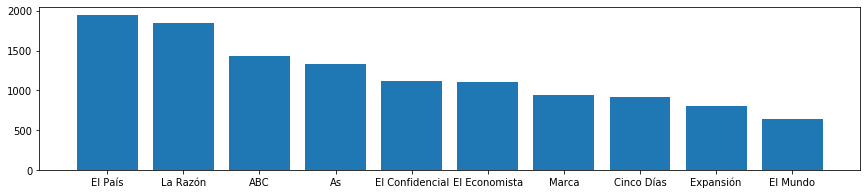

In [31]:
# Generamos gráfico para visualizar el número de noticas por periódico
df_plot_web = pd.DataFrame(df['Web'].value_counts())
names = df_plot_web.index
values = df_plot_web['Web']
plt.figure(figsize=(50, 3))
plt.subplot(131)
plt.bar(names, values)
plt.show()

In [32]:
# Renombramos columna new_id
df = df.rename(columns={"new_id_x": 'new_id'})
# Insertamos contador
df.insert(loc =1, column = 'contador', value = 1)

In [33]:
# Número de noticias únicas tras eliminación de duplicados y depurado de datos
print(df.shape)

(12074, 90011)


### Generación datos para cuadro de mando

- Creamos las tablas main_csv y base_clientes_total para trabajar en R y crear un cuadro de mando dinámico en Shinyapps

In [34]:
# Separamos df en cuerpo principal, datos lecturas y datos rating para aplicar cálculos
main = df.iloc[:, 0:11]
cl   = df.iloc[:, 11:45011]
cr   = df.iloc[:, 45011:90011]

In [35]:
# Creamos los campos average_rating y numero_lecturas
cr["average_rating"]  = cr.mean(axis=1)
cl["numero_lecturas"] = cl.sum(axis=1)

In [36]:
# Creamos el campo tipo de suscripcion
tipo_suscripcion = main['new_id'].tolist() # Creamos lista con los new_id para extraerles 3 posiciones y tener la tipología

# Bucle para extraer las 3 primeras posiciones de cada elemento de la lista
for i,x in enumerate (tipo_suscripcion):
    tipo_suscripcion[i] = tipo_suscripcion[i][0:3]

In [37]:
# Insertamos en la tabla principal de noticias el tipo suscripción, el rating medio y número de lecturas
main.insert(loc=5, column='tipo_suscripcion', value=tipo_suscripcion, allow_duplicates=False) 
main['rating_medio'] = cr['average_rating']     # se hace directamente porque los índices coinciden
main['total_lecturas'] = cl['numero_lecturas']  # se hace directamente porque los índices coinciden

In [38]:
# Exportamos dataframe a csv para trabajar en R y generar información para el cuadro de mando en Shinyapps
main_csv = main[['new_id', 'contador', 'Web', 'Título', 'Autor', 'tipo_suscripcion',
       'Cabecera', 'Fecha', 'rating_medio', 'total_lecturas']].copy()
main_csv.to_csv(r'C:\Users\david\Documents\6_Master\3_Master\000_TFM\1_Minerva\datos_exportados\main.csv',sep=';',encoding='utf-8-sig', index = True)

In [39]:
# Generamos tabla de clientes con las noticias leidas, puntuadas y puntuaciones de cada cliente por periódico
webs = df['Web'].drop_duplicates().tolist()
li = []
for i in webs:
    df_webs = df.loc[df['Web'] == i]
    main_webs = df_webs.iloc[:, 0:11]
    cl_webs   = df_webs.iloc[:, 11:45011]
    cr_webs   = df_webs.iloc[:, 45011:90011]
    cr_T_webs = cr_webs.T                                      # Trasponemos los datasets para operar con los clientes
    cl_T_webs = cl_webs.T
    cr_T_webs["noticias_puntuadas"]  = cr_T_webs.count(axis=1) # Creamos los campos: total noticias puntuadas, puntuación media y noticias leidas
    cr_T_webs["puntuacion_media"]    = cr_T_webs.mean(axis=1)
    cl_T_webs["noticias_leidas"]     = cl_T_webs.sum(axis=1)

    x = pd.DataFrame(cl_T_webs['noticias_leidas']);    x.insert(0, 'Customer_ID', range(1, 1 + len(x)))
    y = pd.DataFrame(cr_T_webs['noticias_puntuadas']); y.insert(0, 'Customer_ID', range(1, 1 + len(y)))
    z = pd.DataFrame(cr_T_webs['puntuacion_media']);   z.insert(0, 'Customer_ID', range(1, 1 + len(z)))

    x = pd.merge(x, y, on='Customer_ID')                       # Unimos las tablas
    x = pd.merge(x, z, on='Customer_ID')
    x["Web"] = i
    li.append(x)
    
base_clientes= pd.concat(li, axis=0, ignore_index=True)    

In [40]:
# Generamos tabla de clientes con las noticias leidas, puntuadas y puntuaciones de cada cliente a nivel agregado
cr_T = cr.T
cl_T = cl.T
cr_T["noticias_puntuadas"]  = cr_T.count(axis=1)
cr_T["puntuacion_media"]    = cr_T.mean(axis=1)
cl_T["noticias_leidas"]     = cl_T.sum(axis=1)
cr_T = cr_T.drop(['average_rating'])                   # eliminamos las filas agregadas de lecturas y ratint por noticia creadas anteriormente para quedarnos exclusivamente con los 45.000 clientes 
cl_T = cl_T.drop(['numero_lecturas'])

x = pd.DataFrame(cl_T['noticias_leidas']);    x.insert(0, 'Customer_ID', range(1, 1 + len(x)))
y = pd.DataFrame(cr_T['noticias_puntuadas']); y.insert(0, 'Customer_ID', range(1, 1 + len(y)))
z = pd.DataFrame(cr_T['puntuacion_media']);   z.insert(0, 'Customer_ID', range(1, 1 + len(z)))

x = pd.merge(x, y, on='Customer_ID')
x = pd.merge(x, z, on='Customer_ID')
x['Web'] = 'Total'

    
base_clientes_total= pd.concat([base_clientes, x], axis=0, ignore_index=True)    

In [41]:
# Le incorporamos la información de las suscripciones 
base_clientes_total = pd.merge(base_clientes_total,suscripciones_df[['Customer_ID', 'suscripcion']], on='Customer_ID',how='left')

In [42]:
base_clientes_total.to_csv(r'C:\Users\david\Documents\6_Master\3_Master\000_TFM\1_Minerva\datos_exportados\base_clientes.csv',sep=';',encoding='utf-8-sig', index = True)

### Exportación de tabla definitiva

- Finalizado el proceso, podemos exportar la tabla definitiva. Dado el tamaño que alzanza y la dificultad para su posterior importación lo dejamos desactivado. 

In [44]:
#df.to_csv(r'C:\Users\david\Documents\6_Master\3_Master\000_TFM\1_Minerva\datos_exportados\df_310720.csv',sep=';',encoding='utf-8-sig', index = True)